# BISECTION METHOD

 Iterations         a         b       x_k    e_a (%)     f(x_k)
          1 0.4000000 0.5000000 0.4500000 11.1111111  0.0183122
          2 0.4000000 0.4500000 0.4250000  5.8823529 -0.0454096
          3 0.4250000 0.4500000 0.4375000  2.8571429 -0.0136697
          4 0.4375000 0.4500000 0.4437500  1.4084507  0.0022908
          5 0.4375000 0.4437500 0.4406250  0.7092199 -0.0056970
          6 0.4406250 0.4437500 0.4421875  0.3533569 -0.0017050
          7 0.4421875 0.4437500 0.4429687  0.1763668  0.0002924
          8 0.4421875 0.4429687 0.4425781  0.0882613 -0.0007064
          9 0.4425781 0.4429687 0.4427734  0.0441112 -0.0002070
         10 0.4427734 0.4429687 0.4428711  0.0220507  0.0000427
         11 0.4427734 0.4428711 0.4428223  0.0110266 -0.0000822
         12 0.4428223 0.4428711 0.4428467  0.0055130 -0.0000197
         13 0.4428467 0.4428711 0.4428589  0.0027564  0.0000115
         14 0.4428467 0.4428589 0.4428528  0.0013782 -0.0000041
         15 0.4428528 0.4428589 0.442855

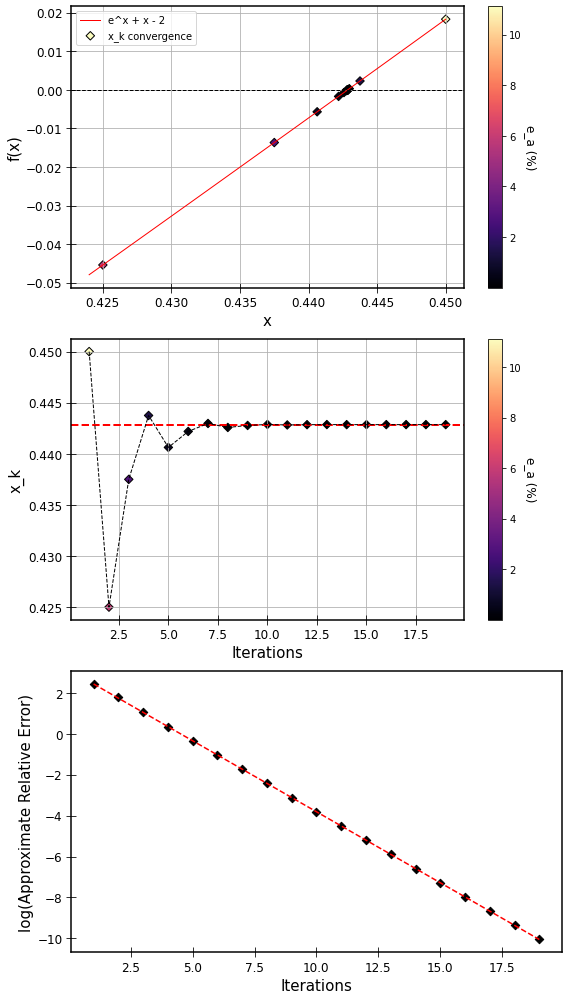

In [3]:
# Import the necessary libraries
import sympy as sy
from sympy.utilities import lambdify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Define the function using symbolic math
x = sy.symbols("x")
f = sy.exp(x) + x -2
f = lambdify(x, f) # This is necessary for evaluating the function at specific x

""" The initial choises of the boundaries were made empirically to include the solution of the equation in the interval """

# f changes sign between 0.4 and 0.5
a = 0.4 # Define the initial low boundary f(a)<0
b = 0.5 # Define the initial upper boundary f(b)>0

# Initial guess of solution, first iteration 
x_k = (a + b)/2

# Use the Scarborough Formula for 6 significant figures, n = 6
e_s = (0.5*10**(2-6)) # %

""" Start of the convergence """

e_a = abs((b - a)/(b + a))*100 # Use this formula to give an initial value to the relative error

i = 1 # Initialize a variable to count the number of iterations

data = [(i, a, b, x_k, e_a, f(x_k))] # Define a list to store the values in each iteration that also contains the initial values

while abs(e_a) > e_s:
    
    i += 1 # Count the iterations
     
    
    if f(a)*f(x_k) < 0:

        b = x_k # New b

        """ a remains the same """

        x_k = (a + b)/2 # New x_k
        
        e_a = abs((x_k - b)/x_k)*100 # Estimate the new relative error
        
        data.append((i, a, b, x_k, e_a, f(x_k))) # Store the values to a list
        
    else:
        
        a = x_k # New a
        
        """ b remains the same """
        
        x_k = (a + b)/2 # New x_k
        
        e_a = abs((x_k - a)/x_k)*100 # Estimate the new relative error
        
        data.append((i, a, b, x_k, e_a, f(x_k))) # Store the values to a list

cols = ['Iterations', 'a', 'b', 'x_k', 'e_a (%)', 'f(x_k)'] # Define the names of columns for a dataframe
df = pd.DataFrame(data, columns=cols) # Create the dataframe

# Use to_string method and float_format parameter to print the solutions with 7 digits in order to be more clear the 6 significant digits
df_str = df.to_string(float_format="{:.7f}".format, index=False)
print(df_str)

# Print the estimated root with 6 significant figures
root = "{:.6f}".format(df['x_k'][i - 1])
error = "{:.7f}".format(df['e_a (%)'][i - 1])
print('\nThe estimated root with 6 significant figures is: ', root, "+-", error)

# Display the convergence
xi = np.linspace(0.424, 0.45)
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize = (8, 14))

ax1.plot(xi, f(xi), 'r', linewidth = 1, label = 'e^x + x - 2')

# Customize the plot
ax1.axhline(0, color = 'black', linestyle ='dashed', linewidth = 1)
ax1.grid(True)
sc = ax1.scatter(df['x_k'], df['f(x_k)'], marker = 'D', c=df['e_a (%)'], cmap='magma', edgecolors='black', label = 'x_k convergence',  alpha=1)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(12)
ax1.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.set_xlabel("x", fontsize=15)
ax1.set_ylabel("f(x)", fontsize=15)
ax1.legend()
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label('e_a (%)', rotation=270, labelpad=15, fontsize=12)

scatter = ax2.scatter(df['Iterations'], df['x_k'], marker = 'D', c=df['e_a (%)'], cmap='magma', edgecolors='black', alpha=1)

# Customize the plot
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
ax2.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.set_xlabel("Iterations", fontsize=15)
ax2.set_ylabel("x_k", fontsize=15)
ax2.axhline(0.4428545, color = 'red', linestyle='dashed', linewidth =2)
ax2.grid(True)
ax2.plot(df['Iterations'], df['x_k'], color = 'black', linestyle = 'dashed', linewidth =1)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('e_a (%)', rotation=270, labelpad=15, fontsize=12)

n = len(df['e_a (%)'])
df['log(e_a)'] = df['e_a (%)'].apply(lambda x: math.log(x))
xy = np.sum(df['Iterations']*df['log(e_a)'])
x2 = np.sum(df['Iterations']**2)

ax3.scatter(df['Iterations'], df['log(e_a)'], marker = 'D', c = 'black')

# Customize the plot
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set_fontsize(12)
ax3.tick_params(axis='both', which="major", length=10, direction="inout")
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(1.5)
ax3.set_xlabel("Iterations", fontsize=15)
ax3.set_ylabel("log(Approximate Relative Error)", fontsize=15)

# Linear Fitting
c = (n*xy - np.sum(df['Iterations'])*np.sum(df['log(e_a)']))/(n*x2 - (np.sum(df['Iterations']))**2)
print('The rate of convergence for the Bisection method is:', c)
b = ((x2*np.sum(df['log(e_a)'])) - xy*np.sum(df['Iterations']))/(n*x2 - (np.sum(df['Iterations']))**2)

y = c*df['Iterations'] + b
ax3.plot(df['Iterations'], y, label='Linear Fit Bisection', linestyle='--', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

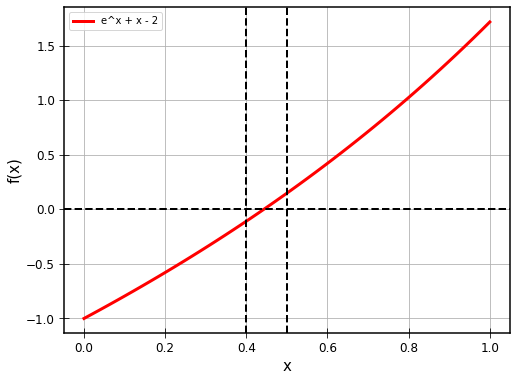

In [10]:
# Display the convergence
xi = np.linspace(0.0, 1.0)
fig, ax1 = plt.subplots(figsize = (8, 6))

ax1.plot(xi, f(xi), 'r', linewidth = 3, label = 'e^x + x - 2')

# Customize the plot
ax1.axhline(0, color = 'black', linestyle ='dashed', linewidth = 2)
ax1.grid(True)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(12)
ax1.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.set_xlabel("x", fontsize=15)
ax1.set_ylabel("f(x)", fontsize=15)
ax1.axvline(0.4, color = 'black', linestyle='dashed', linewidth =2)
ax1.axvline(0.5, color = 'black', linestyle='dashed', linewidth =2)

ax1.legend()

# FALSE POSITION METHOD

 Iterations         a         b       x_k    e_a (%)     f(x_k)
          1 0.4000000 0.5000000 0.4421085 11.1111111 -0.0019069
          2 0.4421085 0.5000000 0.4428414  0.1654993 -0.0000332
          3 0.4428414 0.5000000 0.4428542  0.0028839 -0.0000006
          4 0.4428542 0.5000000 0.4428544  0.0000503 -0.0000000
          5 0.4428544 0.5000000 0.4428544  0.0000009 -0.0000000

The estimated root with 6 significant figures is:  0.442854 +- 0.0000009


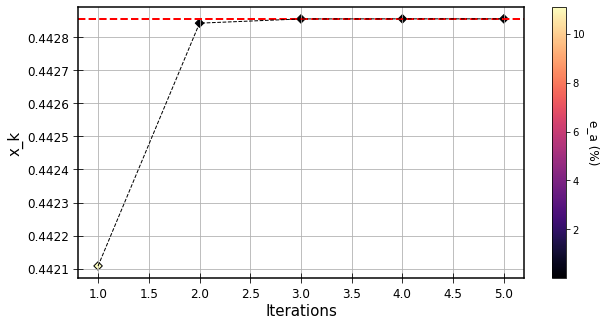

In [12]:
# Import the necessary libraries
import sympy as sy
from sympy.utilities import lambdify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the function using symbolic math
x = sy.symbols("x")
f = sy.exp(x) + x -2
f = lambdify(x, f) # This is necessary for evaluating the function at specific x

""" The initial choises of the boundaries were made empirically to include the solution of the equation in the interval """

# f changes sign between 0.4 and 0.5
a1 = 0.4 # Define the initial low boundary f(a)<0
b1 = 0.5 # Define the initial upper boundary f(b)>0

# Initial guess of solution, first iteration
x_k1 = b1 - (f(b1)*(b1 - a1))/(f(b1) - f(a1))


# Use the Scarborough Formula for 6 significant figures, n = 6
e_s = (0.5*10**(2-6)) # %

""" Start of the convergence """

e_a1 = abs((b1 - a1)/(b1 + a1))*100 # Use this formula to give an initial value to the relative error

i = 1 # Initialize a variable to count the number of iterations

data = [(i, a1, b1, x_k1, e_a1, f(x_k1))] # Define a list to store the values in each iteration that also contains the initial values

while abs(e_a1) > e_s:
    
    i += 1 # Count the iterations
     
    
    if f(a1)*f(x_k1) < 0:

        b1 = x_k1 # New b

        """ a remains the same """

        x_k1 = b1 - (f(b1)*(b1 - a1))/(f(b1) - f(a1)) # New x_k
        
        e_a1 = abs((x_k1 - b1)/x_k1)*100 # Estimate the new relative error
        
        data.append((i1, a1, b1, x_k1, e_a1, f(x_k1))) # Store the values to a list
        
    else:
        
        a1 = x_k1 # New a
        
        """ b remains the same """
        
        x_k1 = b1 - (f(b1)*(b1 - a1))/(f(b1) - f(a1)) # New x_k
        
        e_a1 = abs((x_k1 - a1)/x_k1)*100 # Estimate the new relative error
        
        data.append((i, a1, b1, x_k1, e_a1, f(x_k1))) # Store the values to a list

cols = ['Iterations', 'a', 'b', 'x_k', 'e_a (%)', 'f(x_k)'] # Define the names of columns for a dataframe
df1 = pd.DataFrame(data, columns=cols) # Create the dataframe

# Use to_string method and float_format parameter to print the solutions with 7 digits in order to be more clear the 6 significant digits
df_str = df1.to_string(float_format="{:.7f}".format, index=False)
print(df_str)

# Print the estimated root with 6 significant figures
root = "{:.6f}".format(df1['x_k'][i - 1])
error = "{:.7f}".format(df1['e_a (%)'][i - 1])
print('\nThe estimated root with 6 significant figures is: ', root, "+-", error)

# Display the convergence
xi = np.linspace(0, 3)
fig, ax = plt.subplots(figsize = (10, 5))

scatter = ax.scatter(df1['Iterations'], df1['x_k'], marker = 'D', c=df1['e_a (%)'], cmap='magma', edgecolors='black', alpha=1)

# Customize the plot
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.set_xlabel("Iterations", fontsize=15)
ax.set_ylabel("x_k", fontsize=15)
ax.axhline(0.4428544, color = 'red', linestyle='dashed', linewidth =2)
ax.grid(True)
plt.plot(df1['Iterations'], df1['x_k'], color = 'black', linestyle = 'dashed', linewidth =1)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('e_a (%)', rotation=270, labelpad=15, fontsize=12)

# Compare the Approximate Relative Errors of the two methods

The rate of convergence for the Bisection method is: -0.69365603150345
The rate of convergence for the False position method is: -4.081183922048159


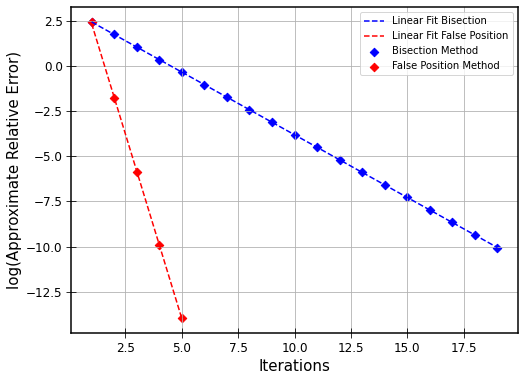

In [13]:
import math

# Calculate the rate of convergence for both methods using Least Squares Linear Regression
n = len(df['e_a (%)'])
df['log(e_a)'] = df['e_a (%)'].apply(lambda x: math.log(x))

n1 = len(df1['e_a (%)'])
df1['log(e_a)'] = df1['e_a (%)'].apply(lambda x: math.log(x))

# Bisection method
xy = np.sum(df['Iterations']*df['log(e_a)'])
x2 = np.sum(df['Iterations']**2)

c = (n*xy - np.sum(df['Iterations'])*np.sum(df['log(e_a)']))/(n*x2 - (np.sum(df['Iterations']))**2)
print('The rate of convergence for the Bisection method is:', c)
b = ((x2*np.sum(df['log(e_a)'])) - xy*np.sum(df['Iterations']))/(n*x2 - (np.sum(df['Iterations']))**2)

# False position method
xy1 = np.sum(df1['Iterations']*df1['log(e_a)'])
x2_1 = np.sum(df1['Iterations']**2)

c1 = (n1*xy1 - np.sum(df1['Iterations'])*np.sum(df1['log(e_a)']))/(n1*x2_1 - (np.sum(df1['Iterations']))**2)
print('The rate of convergence for the False position method is:', c1)
b1 = ((x2_1*np.sum(df1['log(e_a)'])) - xy1*np.sum(df1['Iterations']))/(n1*x2_1 - (np.sum(df1['Iterations']))**2)

# Display the results
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(df['Iterations'], df['log(e_a)'], label = 'Bisection Method', marker = 'D', c = 'blue')
ax.scatter(df1['Iterations'], df1['log(e_a)'], label = 'False Position Method', marker = 'D', c = 'red')
ax.legend()
ax.grid(True)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.set_xlabel("Iterations", fontsize=15)
ax.set_ylabel("log(Approximate Relative Error)", fontsize=15)
ax.legend()

# Linear Fitting
y = c*df['Iterations'] + b
ax.plot(df['Iterations'], y, label='Linear Fit Bisection', linestyle='--', color='blue')

y1 = c1*df1['Iterations'] + b1
ax.plot(df1['Iterations'], y1, label='Linear Fit False Position', linestyle='--',  color='red')
ax.legend()

# FIXED-POINT ITERATION

## Plot of x=g(x)

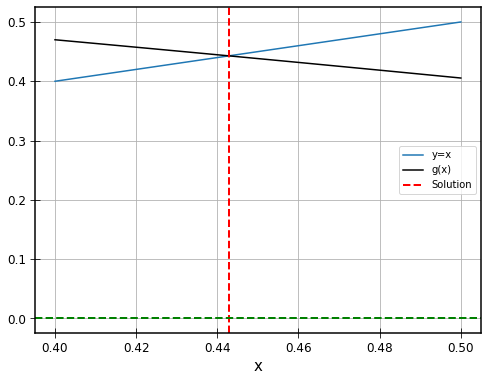

In [113]:
xi = np.linspace(0.4, 0.5) # Interval to use for the plotting
y = x
y = lambdify(x, y) # Necessary for evaluating the function at certain x points

# Define g(x)
g = sy.log(2 - x)
g = lambdify(x, g) # Necessary for evaluating the function at certain x points

# Plot x and g(x)
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(xi, y(xi), label='y=x')
ax.plot(xi, g(xi), 'black', label = 'g(x)')
ax.grid(True)
ax.axvline(0.4428544, color = 'red', linestyle='dashed', linewidth =2, label = 'Solution')
ax.axhline(0.00, color = 'green', linestyle='dashed', linewidth =2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.set_xlabel("x", fontsize=15)
ax.legend()

## Plot of g(x) and g'(x)

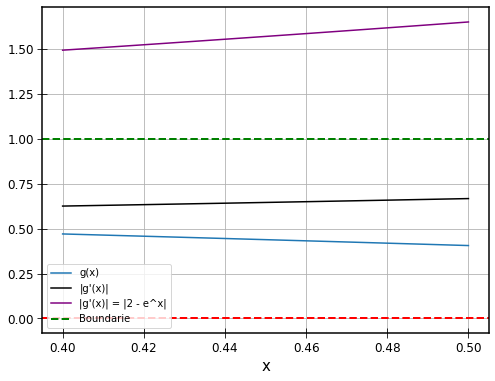

In [114]:
g=sy.log(2 - x)
g_tonos = sy.diff(g)
g_tonos = lambdify(x, g_tonos) # Necessary for evaluating the derivative at certain x points
g = lambdify(x, g)

g_if = 2 - sy.exp(x)
g_if_tonos = sy.diff(g_if)
g_if_tonos = lambdify(x, g_if_tonos)

# Plot x and g(x)
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(xi, g(xi), label='g(x)')
ax.plot(xi, abs(g_tonos(xi)), 'black', label = "|g'(x)|")
ax.plot(xi, abs(g_if_tonos(xi)), 'purple', label = "|g'(x)| = |2 - e^x|")

ax.grid(True)
ax.axhline(0.00, color = 'red', linestyle='dashed', linewidth =2)
ax.axhline(1.0, color = 'green', linestyle='dashed', linewidth =2, label = 'Boundarie')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.set_xlabel("x", fontsize=15)
ax.legend()

# Fixed Point Method

 Iterations       x_k    e_a (%)     f(x_k)
          1 0.4500000 11.1111111  0.0183122
          2 0.4382549  2.6799628 -0.0117451
          3 0.4458038  1.6933231  0.0075489
          4 0.4409585  1.0988224 -0.0048454
          5 0.4440712  0.7009558  0.0031127
          6 0.4420727  0.4520910 -0.0019986
          7 0.4433563  0.2895330  0.0012837
          8 0.4425320  0.1862679 -0.0008243
          9 0.4430614  0.1194854  0.0005294
         10 0.4427214  0.0767897 -0.0003400
         11 0.4429398  0.0492912  0.0002183
         12 0.4427996  0.0316644 -0.0001402
         13 0.4428896  0.0203310  0.0000900
         14 0.4428318  0.0130582 -0.0000578
         15 0.4428689  0.0083853  0.0000371
         16 0.4428451  0.0053853 -0.0000238
         17 0.4428604  0.0034583  0.0000153
         18 0.4428506  0.0022210 -0.0000098
         19 0.4428569  0.0014263  0.0000063
         20 0.4428528  0.0009160 -0.0000041
         21 0.4428554  0.0005882  0.0000026
         22 0.4428537  0.0003778

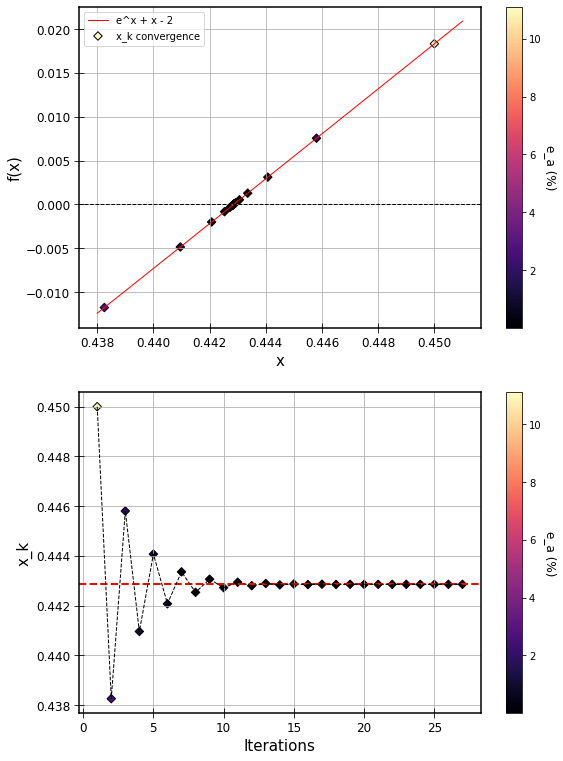

In [283]:
# Import the necessary libraries
import sympy as sy
from sympy.utilities import lambdify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the function using symbolic math
x = sy.symbols("x")
f = sy.exp(x) + x -2
f = lambdify(x, f) # This is necessary for evaluating the function at specific x

# Define the interval
a = 0.4
b = 0.5

# Initial guess of solution, first iteration
x_o = 0.45 # Choose the (a + b)/2 for interval [a, b]

# Use the Scarborough Formula for 6 significant figures, n = 6
e_s = (0.5*10**(2-6)) # %

""" Start of the convergence """

e_a = abs((b - a)/(b + a))*100 # Initialize the relative error

i = 1 # Initialize a variable to count the number of iterations

data = [(i, x_o, e_a, f(x_o))] # Define a list to store the values in each iteration that also contains the initial values

while abs(e_a) > e_s:
    
    i += 1 # Count the iterations

    x_k = math.log(2 - x_o)

    e_a = abs((x_k - x_o)/x_k)*100 # Estimate the new relative error

    x_o = x_k # New x_o
    
    data.append((i, x_k, e_a, f(x_k))) # Store the values to a list
        

cols = ['Iterations', 'x_k', 'e_a (%)', 'f(x_k)'] # Define the names of columns for a dataframe
df2 = pd.DataFrame(data, columns=cols) # Create the dataframe

# Use to_string method and float_format parameter to print the solutions with 7 digits in order to be more clear the 6 significant digits
df_str = df2.to_string(float_format="{:.7f}".format, index=False)
print(df_str)

# Print the estimated root with 6 significant figures
root = "{:.6f}".format(df2['x_k'][i - 1])
error = "{:.7f}".format(df2['e_a (%)'][i - 1])
print('\nThe estimated root with 6 significant figures is: ', root, "+-", error)

# Display the convergence
xi = np.linspace(0.438, 0.451)
fig, [ax1, ax2] = plt.subplots(2, 1, figsize = (9, 13))

ax1.plot(xi, f(xi), 'r', linewidth = 1, label = 'e^x + x - 2')

# Customize the plot
ax1.axhline(0, color = 'black', linestyle ='dashed', linewidth = 1)
ax1.grid(True)
sc = ax1.scatter(df2['x_k'], df2['f(x_k)'], marker = 'D', c=df2['e_a (%)'], cmap='magma', edgecolors='black', label = 'x_k convergence',  alpha=1)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(12)
ax1.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.set_xlabel("x", fontsize=15)
ax1.set_ylabel("f(x)", fontsize=15)
ax1.legend()
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label('e_a (%)', rotation=270, labelpad=15, fontsize=12)

scatter = ax2.scatter(df2['Iterations'], df2['x_k'], marker = 'D', c=df2['e_a (%)'], cmap='magma', edgecolors='black', alpha=1)

# Customize the plot
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(12)
ax2.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.set_xlabel("Iterations", fontsize=15)
ax2.set_ylabel("x_k", fontsize=15)
ax2.axhline(0.4428544, color = 'red', linestyle='dashed', linewidth =2)
ax2.grid(True)

plt.plot(df2['Iterations'], df2['x_k'], color = 'black', linestyle = 'dashed', linewidth =1)
cbar2 = plt.colorbar(scatter, ax=ax2)
cbar2.set_label('e_a (%)', rotation=270, labelpad=15, fontsize=12)

The rate of convergence for the Bisection method is: -0.69365603150345

The rate of convergence for the False position method is: -4.081183922048159

The rate of convergence for the Bisection method is: -0.45075163679001995


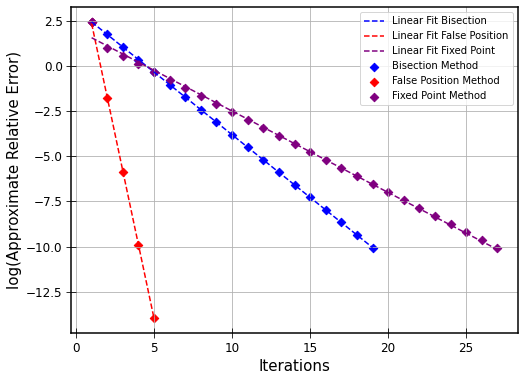

In [260]:
# Calculate the rate of convergence for the methods using Least Squares Linear Regression
n = len(df['e_a (%)'])
df['log(e_a)'] = df['e_a (%)'].apply(lambda x: math.log(x))

n1 = len(df1['e_a (%)'])
df1['log(e_a)'] = df1['e_a (%)'].apply(lambda x: math.log(x))

n2 = len(df2['e_a (%)'])
df2['log(e_a)'] = df2['e_a (%)'].apply(lambda x: math.log(x)) 

# Bisection method
xy = np.sum(df['Iterations']*df['log(e_a)'])
x2 = np.sum(df['Iterations']**2)

c = (n*xy - np.sum(df['Iterations'])*np.sum(df['log(e_a)']))/(n*x2 - (np.sum(df['Iterations']))**2)
print('The rate of convergence for the Bisection method is:', c)
b = ((x2*np.sum(df['log(e_a)'])) - xy*np.sum(df['Iterations']))/(n*x2 - (np.sum(df['Iterations']))**2)

# False position method
xy1 = np.sum(df1['Iterations']*df1['log(e_a)'])
x2_1 = np.sum(df1['Iterations']**2)

c1 = (n1*xy1 - np.sum(df1['Iterations'])*np.sum(df1['log(e_a)']))/(n1*x2_1 - (np.sum(df1['Iterations']))**2)
print('\nThe rate of convergence for the False position method is:', c1)
b1 =  ((x2_1*np.sum(df1['log(e_a)'])) - xy1*np.sum(df1['Iterations']))/(n1*x2_1 - (np.sum(df1['Iterations']))**2)

# Fixed point method
xy2 = np.sum(df2['Iterations']*df2['log(e_a)'])
x2_2 = np.sum(df2['Iterations']**2)

c2 = (n2*xy2 - np.sum(df2['Iterations'])*np.sum(df2['log(e_a)']))/(n2*x2_2 - (np.sum(df2['Iterations']))**2)
print('\nThe rate of convergence for the Bisection method is:', c2)
b2 =  ((x2_2*np.sum(df2['log(e_a)'])) - xy2*np.sum(df2['Iterations']))/(n2*x2_2 - (np.sum(df2['Iterations']))**2)

# Display the results
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(df['Iterations'], df['log(e_a)'], label = 'Bisection Method', marker = 'D', c = 'blue')
ax.scatter(df1['Iterations'], df1['log(e_a)'], label = 'False Position Method', marker = 'D', c = 'red')
ax.scatter(df2['Iterations'], df2['log(e_a)'], label = 'Fixed Point Method', marker = 'D', c = 'purple')
ax.legend()
ax.grid(True)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.tick_params(axis = 'both', which = "major", length = 10, direction = "inout")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.set_xlabel("Iterations", fontsize=15)
ax.set_ylabel("log(Approximate Relative Error)", fontsize=15)
ax.legend()

# Linear Fitting
y = c*df['Iterations'] + b
ax.plot(df['Iterations'], y, label='Linear Fit Bisection', linestyle='--', color='blue')

y1 = c1*df1['Iterations'] + b1
ax.plot(df1['Iterations'], y1, label='Linear Fit False Position', linestyle='--',  color='red')

y2 = c2*df2['Iterations'] + b2
ax.plot(df2['Iterations'], y2, label='Linear Fit Fixed Point', linestyle='--', color='purple')

ax.legend()